# Keller - Segel 1 d Ejemplo 2 (Con fuente de calor)

Consideraremos un esquema implícito para el tiempo, unas diferencias regresivas para $\nabla v$ y una progresiva para el término convectivo

In [10]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [11]:
import math

Consideremos la siguiente ecuación:

$u_t = Du_{xx} - c \nabla \cdot (u v_x)$ para $0\leq x \leq L$ y $0 \leq t \leq T$

$v_t = E v_{xx} - k_1 v + k_2 u$

Con las condiciones de frontera:

$u(0,t)=0$ y $u(L,t)=0$ para $0\leq t \leq T$

Y con la condición inicial:

$u(x,0)=f(x)$ para $0\leq x \leq L$

Ahora cogeremos el número de nodos que tomaremos en cada intervalo. $Nx-1$ será el número de nodos interiores que tomaremos en el intervalo $[0,L]$ y $Nt-1$ será el número de nodos interiores que tomaremos en el intervalo $[0,T]$ (Es decir, si al final tendremos $Nt+1$ puntos contando los de los extremos en cada intervalo). 

A continuación, $a$ indica $\alpha$. Para comenzar de forma sencilla vamos a considerar $\alpha=1$.

In [12]:
from numpy import linspace, array

In [13]:
import ipywidgets

In [14]:
def implicit_1d(n, D2,k, h, k1, k2, v1, u1):
    v=zeros(n+1)
    r = D2*k/(h**2)
    s1 = k*k1
    s2 = k*k2
    for i in range(1,n-1):
        v[i]=r*v1[i+1]+(1-2*r-s1)*v1[i]+r*v1[i-1]+s2*u1[i]
    v[0]=v[1]
    v[n]=v[n-1]
    return v

In [15]:
def reg_prog_1d(n, m, D1, c, k, h, u1, v1, x, t, j):
    u=zeros(n+1)
    p1 = D1*k/(4*h**2)
    p2 = c*k/(h**2)
    def f(x, t): return exp(-2*t)*cos(2*x)
    for i in range(1, n-1):
        u[i]= u1[i]-p1*(3*(v1[i+1]-v1[i-1])*u1[i]-4*(v1[i]-v1[i-2])*u1[i-1] + (v1[i-1]-v1[i-3])*u1[i-2])+p2*(u1[i+1]-2*u1[i]+u1[i-1])+k*f(x[i],t[j])
    u[0]=u[1]
    u[n]=u[n-1]
    return u    

In [16]:
def ks_progres_1d(a, b, T1, T2, n, m, D1, D2, k1, k2, c, coef):
    x = linspace(a, b, n+1)
    h = x[1] - x[0]
    t = linspace(T1, T2, m+1)
    k = t[1] - t[0]
    def u0(x):return exp(-coef*(x-(a+b)/2)) # Cambiar función
    def v0(x): return exp(-coef*(x-(a+b)/2))
    v=zeros(n+1)
    v1=zeros(n+1)
    u=zeros(n+1)
    u1=zeros(n+1)

    v1= v0(x)
    u1=u0(x)

    #for i in range(0, n+1):
    #    v1[i]=v0(x[i])

    #for i in range(0, n+1):
    #    u1[i]=u0(x[i])

    listu=[u1]
    listv=[v1]

    for j in range(0, m-1):
        v = implicit_1d(n, D2,k, h, k1, k2, v1, u1)
        listv.extend([v])
        u = reg_prog_1d(n, m, D1, c, k, h, u1, v1, x, t, j)
        listu.extend([u])
        u1=u
        v1=v
        u=zeros(n+1)
        v=zeros(n+1)
    return x, t, listu, listv

In [17]:
x_h, t_h, lista_u, lista_v = ks_progres_1d(0,2*pi,0,1,10,400,1,1,1,1,1,2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in double_scalars
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in double_scalars
  import sys


In [18]:
x_h

array([ 0.        ,  0.62831853,  1.25663706,  1.88495559,  2.51327412,
        3.14159265,  3.76991118,  4.39822972,  5.02654825,  5.65486678,
        6.28318531])

In [19]:
t_h

array([ 0.    ,  0.0025,  0.005 ,  0.0075,  0.01  ,  0.0125,  0.015 ,
        0.0175,  0.02  ,  0.0225,  0.025 ,  0.0275,  0.03  ,  0.0325,
        0.035 ,  0.0375,  0.04  ,  0.0425,  0.045 ,  0.0475,  0.05  ,
        0.0525,  0.055 ,  0.0575,  0.06  ,  0.0625,  0.065 ,  0.0675,
        0.07  ,  0.0725,  0.075 ,  0.0775,  0.08  ,  0.0825,  0.085 ,
        0.0875,  0.09  ,  0.0925,  0.095 ,  0.0975,  0.1   ,  0.1025,
        0.105 ,  0.1075,  0.11  ,  0.1125,  0.115 ,  0.1175,  0.12  ,
        0.1225,  0.125 ,  0.1275,  0.13  ,  0.1325,  0.135 ,  0.1375,
        0.14  ,  0.1425,  0.145 ,  0.1475,  0.15  ,  0.1525,  0.155 ,
        0.1575,  0.16  ,  0.1625,  0.165 ,  0.1675,  0.17  ,  0.1725,
        0.175 ,  0.1775,  0.18  ,  0.1825,  0.185 ,  0.1875,  0.19  ,
        0.1925,  0.195 ,  0.1975,  0.2   ,  0.2025,  0.205 ,  0.2075,
        0.21  ,  0.2125,  0.215 ,  0.2175,  0.22  ,  0.2225,  0.225 ,
        0.2275,  0.23  ,  0.2325,  0.235 ,  0.2375,  0.24  ,  0.2425,
        0.245 ,  0.2

In [20]:
from matplotlib.pylab import plot, show, grid, legend

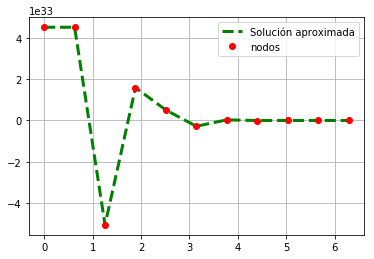

In [21]:
plot(x_h, lista_u[13],"--", label = "Solución aproximada", linewidth=3, color="green")
plot(x_h,lista_u[13],"o",c="r",label="nodos")
grid()
legend()
show()

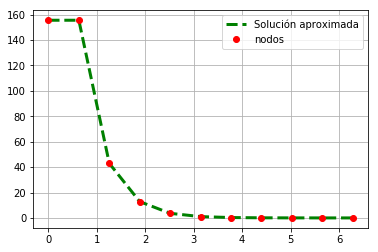

In [22]:
plot(x_h, lista_v[2],"--", label = "Solución aproximada", linewidth=3, color="green")
plot(x_h,lista_v[2],"o",c="r",label="nodos")
grid()
legend()
show()

In [23]:
def u(x,t):return exp(-t)*cos(x)

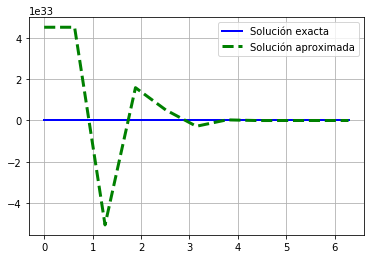

In [24]:
plot(x_h, u(x_h, t_h[13]),"-", label = "Solución exacta", linewidth=2, color="blue")
plot(x_h, lista_u[13],"--", label = "Solución aproximada", linewidth=3, color="green")
grid()
legend()
show()

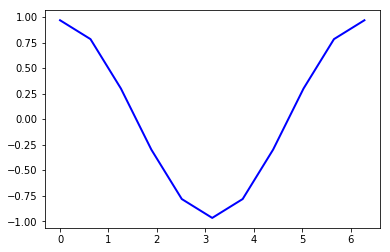

In [25]:
plot(x_h, u(x_h, t_h[13]),"-", label = "Solución aproximada", linewidth=2, color="blue")